# NLP Recommender Movies System

İçerisinde 5000 filmin özelliklerinin bulunduğu bir veri seti üzerinden bir film tavsiye sistemi geliştiriyor olacağız.Bu sistemi geliştirirken NLP içerisinde sıkça kullanılan TfidfVectorizer işlevini kullanıyor olacağız.
Veri setine [buradan](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv) ulaşabilirsiniz.

In [90]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances , cosine_similarity

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [152]:
movies.head(3).T

,0,1,2
budget,237000000,300000000,245000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/
id,19995,285,206647
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
original_language,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...
popularity,150.437577,139.082615,107.376788
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam..."


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [13]:
def overview_dataset(df):
    # Observetions
    print("Number of observetion:", df.shape[0])
    # Features
    print("Number of features:", df.shape[1])
    print("-"*60)
    #Categorical Features
    print("Categorical Features:", df.select_dtypes(include = [object]).columns)
    print("")
    # Numerical Features
    print("Numerical Features:", df.select_dtypes(include = [int,float]).columns)
    
overview_dataset(movies)

Number of observetion: 4803
Number of features: 20
------------------------------------------------------------
Categorical Features: Index(['genres', 'homepage', 'keywords', 'original_language', 'original_title',
       'overview', 'production_companies', 'production_countries',
       'release_date', 'spoken_languages', 'status', 'tagline', 'title'],
      dtype='object')

Numerical Features: Index(['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')


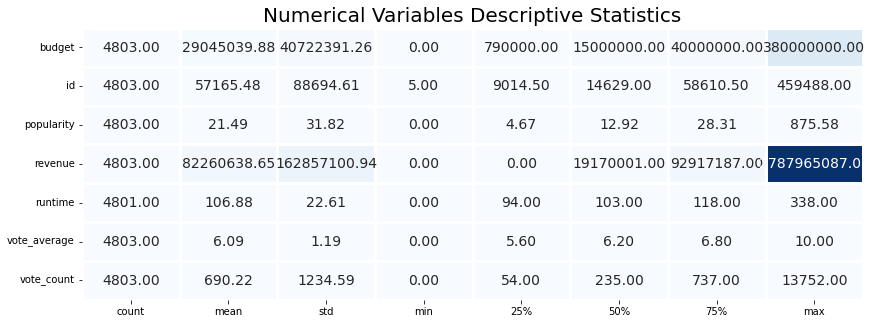

In [156]:
def describe_plot(df):
    numerical_col = df.select_dtypes(include = [int,float]).columns
    describe_numcol_values = df[numerical_col].describe().T
    
    plt.figure(figsize = (14,5))
    sns.heatmap(describe_numcol_values,
                annot = True,
                cmap = "Blues",
                fmt= '.2f',
                linecolor = 'white',
                linewidths = 1.35,
                cbar = False,
                annot_kws = {"size": 14})
    plt.title("Numerical Variables Descriptive Statistics" , fontsize = 20)
    plt.show()
describe_plot(movies)

In [20]:
# Categorical Variables - Describe
movies[movies.select_dtypes(include=[object]).columns].describe().T

,count,unique,top,freq
genres,4803,1175,"[{""id"": 18, ""name"": ""Drama""}]",370
homepage,1712,1691,http://www.missionimpossible.com/,4
keywords,4803,4222,[],412
original_language,4803,37,en,4505
original_title,4803,4801,Out of the Blue,2
overview,4800,4800,"In the 22nd century, a paraplegic Marine is di...",1
production_companies,4803,3697,[],351
production_countries,4803,469,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2977
release_date,4802,3280,2006-01-01,10
spoken_languages,4803,544,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",3171


---

---

``genres`` , ``keywords`` , ``productions_countires`` , ``spoken_languages`` ve ``production_companies`` değişkenleri **json** formatındalar.Bu değişkenleri json olarak yükleyip ardından içerisinden istediğimiz değerlere ulaşıyor olacağız.Fakat film tavsiyesi için kullanıyor olacağımız değişkenler genres ve keywords olacaktır.json olarak yükleme istememizin sebebi şuan için liste içerisinde sözlükler bulunuyor fakat string formatındalar biz bunları liste olarak alıp aynı şekilde içindeki sözlüklere ulaşabiliyor olacağız.

In [22]:
x = movies.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [31]:
j = json.loads(x['genres'])
j, type(j),type(j[0])

([{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 878, 'name': 'Science Fiction'}],
 list,
 dict)

In [40]:
' '.join(''.join(jj['name'].split())  for jj in j)

'Action Adventure Fantasy ScienceFiction'

``genres`` ve ``keywords`` değişkenlerimizde önemli bilgiler tutulmaktadır fakat biz  **id** değerlerini istemiyoruz.Bu bakımdan liste olarak alabilmemiz için öncelikle json yüklemesi gerçekleştiriyoruz ve sonrasında **name** değerlerini alabilmek için join ve split fonksiyonlarını kullanarak name değerlerini temsil eden türleri tek bir string olarak gösteriyoruz.

genres ve keywords değişkenleri içerisindeki name anahtarından aldığımız değerleri tek bir string üzerinde birleştirme işlemi yaparak filmlerin türlerini ve anahtar kelimelerini alıyor olacağız.

In [71]:
def genres_and_keywords_to_string(row):
    # genres
    genres = json.loads(row['genres'])
    genre = ' '.join(''.join(j['name'].split())  for j in genres)
    
    # keywords
    keywords = json.loads(row['keywords'])
    keyword = ' '.join(''.join(j['name'].split())  for j in keywords)
    
    return "%s %s" % (genre, keyword)

genres_and_keywords_to_string(x)

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

In [52]:
movies['string'] = movies.apply(genres_and_keywords_to_string , axis=1)

In [59]:
movies['string'].head()

0    Action Adventure Fantasy ScienceFiction cultur...
1    Adventure Fantasy Action ocean drugabuse exoti...
2    Action Adventure Crime spy basedonnovel secret...
3    Action Crime Drama Thriller dccomics crimefigh...
4    Action Adventure ScienceFiction basedonnovel m...
Name: string, dtype: object

Filmlerin türlerini ve anahtar kelimelerini ``string`` sütununda temsil ettiğimize göre bu değerleri vektörleştirme işlemi yapabiliriz bunun için TF-IDF Vectorizer kullanıyor olacağız.

In [63]:
tfidf = TfidfVectorizer(max_features = 2000)

**max_features**, vektörleştirme işlemi sonucu Compressed Sparse Row matrix oluşacaktır bu matrixin sütun sayısını max_features ile belirtebiliriz.Bu şu demek oluyor en çok tekrar eden değerleri ,sözcükleri al demektir.Çok az tekrar eden değerleri alsın istemiyoruz.Bu değer deneme yanılma yolu ile daha iyi değer seçilebilir.

In [64]:
X = tfidf.fit_transform(movies['string'])
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

Gerçek dünyada kullanılacağı için bir ``train`` ve ``test`` setimiz olmayacağına dikkat edin, çünkü bu, bunun nasıl olduğunu yansıtmaz.

Şimdi, bir sonraki adım biraz garip görünebilir, ancak şimdi bir sayı matrisi ile çalıştığımızı hatırlayın.Matrix'in hangi satırının hangi filme karşılık geldiği belli değil.Elbette verilerimiz sırayla işlenmiştir.Henüz net olmayan nedenlerden dolayı, bize şunu söyleyen bir haritalamaya sahip olmak faydalı olacaktır.belirli bir film, hangi index değerine sahip?

Bunu istemizin sebebi oluşturduğumuz **``X``** değeri ``4803x2000`` bir matrixtir ve **ilk değeri ilk filmi temsil eder ikinci değeri ikinci filmi temsil edecektir** ve eğer filmlerin indexlerine ulaşabilirsek direk olarak filmlerin türlerini ve anahtar kelimelerini temsil eden vektörüne de ulaşabilir oluruz.

- Filmlerin adları ``title`` değişkeninde tutulmakta ve amacımız index değerleri isimler olacak onlara karşılık gelenler değerler ise index değerleri olacakır.

In [82]:
movies_indexs = pd.Series(movies.index , index = movies['title'])
movies_indexs

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

Tavsiye sistemi oluşturmak istediğimizi biliyoruz ve yapmak istediğimiz şeyi tekrar anlatmak gerekir ise ``Vector Similarity`` mantığı ile vektörlerin diğer vektörler ile olan benzerlik skorunu alabilir bu şekilde bir filmin diğer filme olan benzerliğini türleri(genres) ve anahtar kelimlerini(keywords) vektöre çevirerek başka bir film ile benzerlik skorunu elde ediyor olacağız.**Birisi Avatar filmini izlediğinde bu filmede bence bakmalısınız ?** demek temel amacımız olacaktır.

Bu dediklerimizi gerçekleştirmek için tek bir film seçerek onun üzerinden gidelim.

In [81]:
idx = movies_indexs['Scream 3']
idx

1164

Scream 3 filminin index değeri **1164**.

In [84]:
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [160]:
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

Scream 3 filminin türlerini ve anahtar kelimelerini bir string olarak saklayıp vektörleşme işlemi gerçekleştirmiştik aslında bunu tüm filmler için yapmıştık şimdi ise bunun bir dizi olarak gösterimini ``toarray()`` metotu ile bakabiliriz.


Vector Similarity(Vektör Benzerliği) hesaplamak için kullanabileceğimiz 2 en popüler yöntem bulunmaktadır;
- **Cosine Similarity ( Kosinüs Benzerliği )**
- **Euclidean Distance ( Oklid Mesafesi )**


bulunan iki yöntemden biri olan cosine similarity kullanıyor olacağız.

In [93]:
scores = cosine_similarity(query , X)
scores

array([[0., 0., 0., ..., 0., 0., 0.]])

In [94]:
scores.shape

(1, 4803)

Cosine Similarity kullanımdan sonra bize bir dizi döndürdü dizinin uzunluğu ise 4803.Bunun sebebi her bir film ile kıyasladı ve benzerlik skorunu dizi içine kayıt etmiştir.

In [102]:
# currently the array is 1 x N , make it just  a 1-D array
scores = scores.flatten()
scores.shape

(4803,)

Şimdi, dizimiz bir şekle sahip olduğu için, onu bir derece olacak şekilde düzleştirmek istiyoruz.

Skor değerleri sütun olarak tutuluyordu ve biz tek bir vektör haline getirmek için ``flatten`` işlevini kullandık.Bu şekilde benzerlik skorları daha temiz tutuluyor olacak ayrıca görselleştirilebilinir olacaktır.

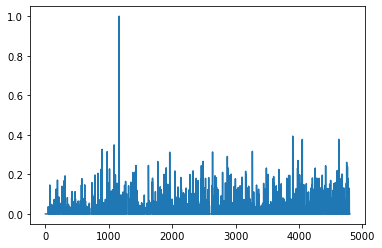

In [103]:
plt.plot(scores)
plt.show()

Bazı değerlerin çok yüksek bazılarının ise çok düşük olduğunu görüyoruz bu Scream 3 filminin diğer filmler ile olan benzerliğini temsil eden bir grafiktir.


Şimdi puanları sıralamak gibi bir şey yapmak istediğimizi biliyoruz.İlk olarak, varsayılan olarak sıralamanın genellikle öğelerin artan düzende gitmesiyle sonuçlandığını biliyoruz.Bizim durumumuzda, en benzer öğe önde olacak şekilde azalan sırada gitmelerini istiyoruz.

Bunun için numpy kütüphanesi içerisinde bulunan ``np.argsort()`` metotunu kullanıyoruz olacağız.Dizi içerisindeki değerleri sıralar fakat index değerlerini verecektir.
```python
x = np.array([3, 1, 2])
np.argsort(x)
# Output
array([1, 2, 0])


```
yukarıdaki örneğe baktığımızda dizi içerisindeki en büyük değer 3 ve index değeri 0 'dır.Çıktı olarak baktığımızda küçükten büyüğe doğru sıralamaktadır ve index değerlerini almaktadır.

In [107]:
# small to big
scores.argsort()

array([   0, 3010, 3011, ..., 4628, 3902, 1164])

In [113]:
# big to small , reverse to array
sorted_scores = scores.argsort()[::-1]
sorted_scores

array([1164, 3902, 4628, ..., 3011, 3010,    0])

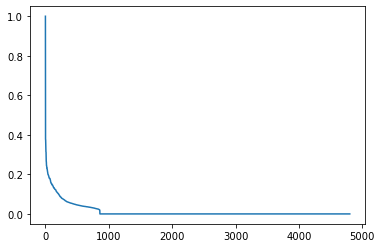

In [112]:
plt.plot(scores[sorted_scores])
plt.show()

En benzer filmden en benzemeyen filmde doğru sıralanmış bir şekilde grafik üzerinde gösterimini görebiliriz.

Buraya kadarki süreçte vektörleşme işlemini ve bu vektörleşme işleminden sonra vektör benzerliğini kullanarak film tavsiyesinin yapı taşını kurmuş olduk şimdi ise tavsiye edilen ilk 5 filmi görelim.

In [114]:
recommended_idx = sorted_scores[1:6]
recommended_idx

array([3902, 4628, 4053, 4048, 1084])

In [133]:
movies['title'].iloc[recommended_idx]

3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object

Scream 3 filmini izleyen bir kullanıcıya en yüksek benzerlik skoru ile tavsiye edilen 5 film şunlardır;
- Friday the 13th Part VI: Jason Lives
- Graduation Day
- Friday the 13th: A New Beginning
- The Calling
- The Glimmer Man

filmlerin hepsi Scream 3 filminde olduğunu gibi korku ve gerilim temalı filmlerdir.

In [157]:
def recommend_movie(title, number_of_recommended_movies):
    # index of movie
    idx = movies_indexs[title]
    if type(idx) == pd.Series:
        idx = idx.iloc[0]
    # vector version of movie[string]
    query = X[idx]
    # cosine_similarity
    scores = cosine_similarity(query , X)
    # currently the array is 1 x N , make it just  a 1-D array
    scores = scores.flatten()
    # big to small sorted array , return index of values
    sorted_scores = scores.argsort()[::-1]
    # indexs value of recommended movies
    recommended_idx = sorted_scores[1:number_of_recommended_movies+1]
    
    return pd.DataFrame(movies['title'].iloc[recommended_idx])

In [158]:
recommend_movie('Avatar', 5)

,title
47,Star Trek Into Darkness
3214,Barbarella
1287,A Monster in Paris
61,Jupiter Ascending
3730,Cargo


In [159]:
recommend_movie('John Carter', 5)

,title
373,Mission to Mars
205,Sherlock Holmes: A Game of Shadows
3405,Stargate: The Ark of Truth
2964,The Last Days on Mars
4384,Guiana 1838
